## Time Series: ADF test for stationarity check

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#interested only in forecating of the sale quantity here:
df = pd.read_excel(r'C:\users\91842\Downloads\store.xls')
df.head()

,Date,demand
0,2014-10-01,15
1,2014-10-02,7
2,2014-10-03,8
3,2014-10-04,10
4,2014-10-05,13


In [7]:
df.set_index(pd.to_datetime(df.Date), inplace=True)

In [8]:
df.drop('Date', axis=1, inplace=True)
df.head()

,demand
Date,
2014-10-01,15
2014-10-02,7
2014-10-03,8
2014-10-04,10
2014-10-05,13


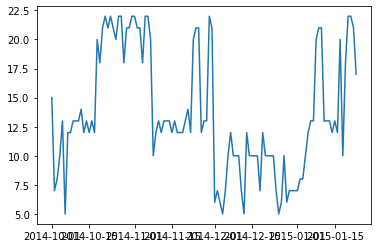

In [10]:
plt.plot(df['demand']);

- So there is some kind of seasonality present in the data but not very clear in the plot.
- So need to apply ADF test to confirm if the data is stationary or not.
- If the data is found to be not stationary then we will apply transformation to make it stationary so taht we can apply ARIMA model on it.

Forecast value using MA:

In [5]:
#df1['Moving_12'] = df1['Sale Quantity'].rolling(window=12).mean().shift(1)  #shift1 means the next value

In [11]:
#df1[['Sale Quantity','Moving_12']]

In [12]:
#plot actual vs forecatsted values:
#plt.plot(df1['Sale Quantity'])
#plt.plot(df1['Moving_12'])

In [13]:
#plot ACF:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

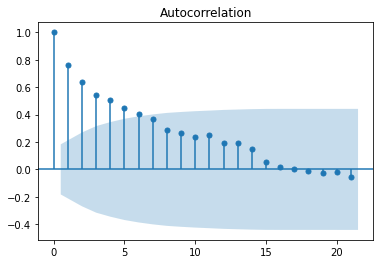

In [14]:
acf_plot = plot_acf(df['demand'])

- So, we can see that are shoot up beyond the boundaries, hence we will take 2 lags
- acf is wrt the previous ones

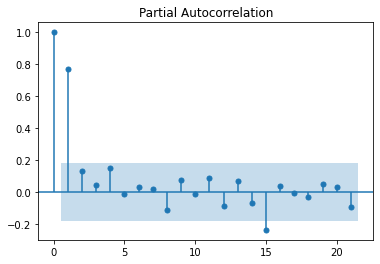

In [16]:
acf_plot = plot_pacf(df['demand'])

check for stationarity:

ADF Test:

In [17]:
from statsmodels.tsa.stattools import adfuller

In [20]:
adfuller(df['demand'])

(-3.828910404169366,
 0.002624994409882755,
 0,
 114,
 {'1%': -3.489057523907491,
  '5%': -2.887246327182993,
  '10%': -2.5804808802708528},
 535.608687798705)

- Here total no of data points=114
- Here no of lags=0, lags 0 means no correlation, it means data is stationary. But we dont want it so consider autolag as 'None'(automatically it considers 13 lags)
- if we increase the lags means increasing correlation, means not stationarity
- if no correlation it means data is stationary.
- correlation means dependent on previous values, means there are lags present..If no of lags=0, it means no correlation, so data is stationary.
- when correlation present data is not stationary.
- 

In [25]:
adfuller(df['demand'], autolag=None)

(-1.6495331143994645,
 0.45728393084534574,
 13,
 101,
 {'1%': -3.4968181663902103,
  '5%': -2.8906107514600103,
  '10%': -2.5822770483285953})

- so, here we can see that the p>0.05, so do not reeject the null.
- so, data is not stationary.

Hence, now apply transformation: differencing of demand

In [26]:
df['demand_difference'] = df['demand']-df['demand'].shift(1)
df['demand_difference']

Date
2014-10-01    NaN
2014-10-02   -8.0
2014-10-03    1.0
2014-10-04    2.0
2014-10-05    3.0
             ... 
2015-01-19    8.0
2015-01-20    4.0
2015-01-21    0.0
2015-01-22   -1.0
2015-01-23   -4.0
Name: demand_difference, Length: 115, dtype: float64

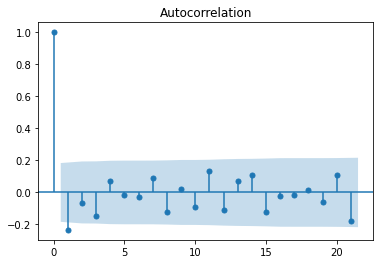

In [28]:
plot_acf(df['demand_difference'].dropna());  #remove the missing value

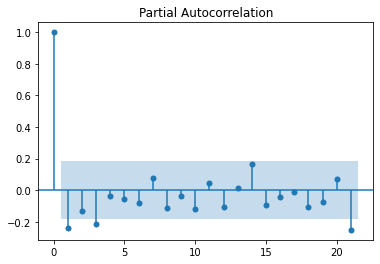

In [29]:
plot_pacf(df['demand_difference'].dropna());  #remove the missing value

- there are still correlations for further values(4 shoot ups)
but not the first consequtive 2 points are shooting up, so can say that no correlation (if the first consequtive 2 points are shooting up then can say that lag is 2).
- so, finally the order we get is (1,1,1)

How to read the ACF & PACF plots?

if we pass i = 2, means differencing two times. then the order is (1,2,1)